## Import the Libraries

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, UpSampling2D, Conv2D, BatchNormalization
from tensorflow.keras.layers import LeakyReLU, Dropout, ZeroPadding2D, Flatten, Activation
from tensorflow.keras.optimizers import Adam
import tqdm
import warnings
warnings.filterwarnings("ignore")
#Settings
sns.set(rc={"axes.facecolor":"#EDE9DE","figure.facecolor":"#D8CA7E"})

## Data Loading and Preprocessing

In [2]:
# Importing the data
disco_data_path = "\\Users\\kbart\\OneDrive\\Desktop\\GAN Cover Art Generator\\images labeled\\images labeled\\disco"
electro_data_path = "\\Users\\kbart\\OneDrive\\Desktop\\GAN Cover Art Generator\\images labeled\\images labeled\\electro"
folk_data_path = "\\Users\\kbart\\OneDrive\\Desktop\\GAN Cover Art Generator\\images labeled\\images labeled\\folk"
rap_data_path = "\\Users\\kbart\\OneDrive\\Desktop\\GAN Cover Art Generator\\images labeled\\images labeled\\rap"
rock_data_path = "\\Users\\kbart\\OneDrive\\Desktop\\GAN Cover Art Generator\\images labeled\\images labeled\\rock"

# Folders to output resized images
discox64_data_path = "\\Users\\kbart\\OneDrive\\Desktop\\GAN Cover Art Generator\\images labeled\\images labeled\\discox64"
electrox64_data_path = "\\Users\\kbart\\OneDrive\\Desktop\\GAN Cover Art Generator\\images labeled\\images labeled\\electrox64"
folkx64_data_path = "\\Users\\kbart\\OneDrive\\Desktop\\GAN Cover Art Generator\\images labeled\\images labeled\\folkx64"
rapx64_data_path = "\\Users\\kbart\\OneDrive\\Desktop\\GAN Cover Art Generator\\images labeled\\images labeled\\rapx64"
rockx64_data_path = "\\Users\\kbart\\OneDrive\\Desktop\\GAN Cover Art Generator\\images labeled\\images labeled\\rockx64"

batch_s = 64

In [3]:
# import cv2
# import os

# input_folders = [disco_data_path, electro_data_path, folk_data_path, rap_data_path, rock_data_path]
# output_folders = [discox64_data_path, electrox64_data_path, folkx64_data_path, rapx64_data_path, rockx64_data_path]

# for input_folder, output_folder in zip(input_folders, output_folders):
    # Create the output folder if it doesn't exist
#     if not os.path.exists(output_folder):
#        os.makedirs(output_folder)

    # Loop through each image in the input folder and resize to 64x64 pixels
#     for filename in os.listdir(input_folder):
#         if filename.endswith('.jpg'):
#             image_path = os.path.join(input_folder, filename)
#             img = cv2.imread(image_path)
#             img_resized = cv2.resize(img, (64, 64), interpolation=cv2.INTER_AREA)
#             output_path = os.path.join(output_folder, filename)
#             cv2.imwrite(output_path, img_resized)

In [3]:
# Import as tf.Dataset
disco_data = tf.keras.preprocessing.image_dataset_from_directory(discox64_data_path, label_mode = None, image_size = (64,64), batch_size = batch_s)
electro_data = tf.keras.preprocessing.image_dataset_from_directory(electrox64_data_path, label_mode = None, image_size = (64,64), batch_size = batch_s)
folk_data = tf.keras.preprocessing.image_dataset_from_directory(folkx64_data_path, label_mode = None, image_size = (64,64), batch_size = batch_s)
rap_data = tf.keras.preprocessing.image_dataset_from_directory(rapx64_data_path, label_mode = None, image_size = (64,64), batch_size = batch_s)
rock_data = tf.keras.preprocessing.image_dataset_from_directory(rockx64_data_path, label_mode = None, image_size = (64,64), batch_size = batch_s)

Found 1783 files belonging to 1 classes.
Found 1864 files belonging to 1 classes.
Found 1900 files belonging to 1 classes.
Found 1853 files belonging to 1 classes.
Found 1911 files belonging to 1 classes.


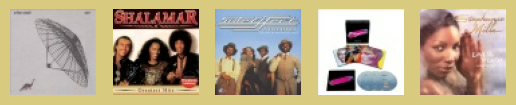

In [4]:
# Extract a batch of images and labels
for images_batch in disco_data.take(1):
    # Display the first 5 images from the batch
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images_batch[i].numpy().astype("uint8"))
        plt.axis("off")
    plt.show()

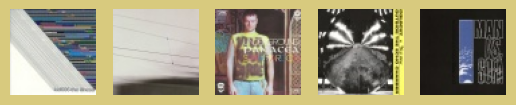

In [5]:
# Extract a batch of images and labels
for images_batch in electro_data.take(1):
    # Display the first 5 images from the batch
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images_batch[i].numpy().astype("uint8"))
        plt.axis("off")
    plt.show()

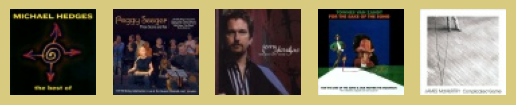

In [6]:
# Extract a batch of images and labels
for images_batch in folk_data.take(1):
    # Display the first 5 images from the batch
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images_batch[i].numpy().astype("uint8"))
        plt.axis("off")
    plt.show()

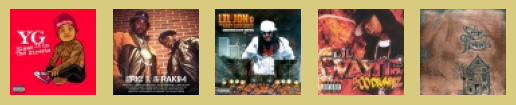

In [7]:
# Extract a batch of images and labels
for images_batch in rap_data.take(1):
    # Display the first 5 images from the batch
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images_batch[i].numpy().astype("uint8"))
        plt.axis("off")
    plt.show()

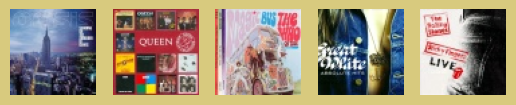

In [8]:
# Extract a batch of images and labels
for images_batch in rock_data.take(1):
    # Display the first 5 images from the batch
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images_batch[i].numpy().astype("uint8"))
        plt.axis("off")
    plt.show()

In [9]:
# Normalize the image data
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255)
rock_data_normalized = rock_data.map(lambda x: normalization_layer(x))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [10]:
# Iterate through the dataset and print shapes and types of images
for images_batch in rock_data_normalized.take(1):
    for i in range(images_batch.shape[0]):
        image = images_batch[i]
        print(f"Image shape: {image.shape}, Image type: {image.dtype}")

Image shape: (64, 64, 3), Image type: <dtype: 'float32'>
Image shape: (64, 64, 3), Image type: <dtype: 'float32'>
Image shape: (64, 64, 3), Image type: <dtype: 'float32'>
Image shape: (64, 64, 3), Image type: <dtype: 'float32'>
Image shape: (64, 64, 3), Image type: <dtype: 'float32'>
Image shape: (64, 64, 3), Image type: <dtype: 'float32'>
Image shape: (64, 64, 3), Image type: <dtype: 'float32'>
Image shape: (64, 64, 3), Image type: <dtype: 'float32'>
Image shape: (64, 64, 3), Image type: <dtype: 'float32'>
Image shape: (64, 64, 3), Image type: <dtype: 'float32'>
Image shape: (64, 64, 3), Image type: <dtype: 'float32'>
Image shape: (64, 64, 3), Image type: <dtype: 'float32'>
Image shape: (64, 64, 3), Image type: <dtype: 'float32'>
Image shape: (64, 64, 3), Image type: <dtype: 'float32'>
Image shape: (64, 64, 3), Image type: <dtype: 'float32'>
Image shape: (64, 64, 3), Image type: <dtype: 'float32'>
Image shape: (64, 64, 3), Image type: <dtype: 'float32'>
Image shape: (64, 64, 3), Image

In [11]:
latent_dim = 100
g_resolution=2

#Building a Generator
generator = Sequential()
generator.add(Dense(4*4*256,activation="relu",input_dim=latent_dim))
generator.add(Reshape((4,4,256)))
generator.add(UpSampling2D())
generator.add(Conv2D(256,kernel_size=3,padding="same"))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Activation("relu"))
generator.add(UpSampling2D())
generator.add(Conv2D(256,kernel_size=3,padding="same"))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Activation("relu"))
generator.add(UpSampling2D())
generator.add(Conv2D(256,kernel_size=3,padding="same"))#
generator.add(BatchNormalization(momentum=0.8))
generator.add(Activation("relu"))
generator.add(UpSampling2D())
generator.add(Conv2D(128,kernel_size=3,padding="same"))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Activation("relu"))
generator.add(Conv2D(3,kernel_size=3,padding="same"))
generator.add(Activation("tanh"))

generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4096)              413696    
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 8, 8, 256)        0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 256)         590080    
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 256)        1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 8, 8, 256)         0

(-0.5, 63.5, 63.5, -0.5)

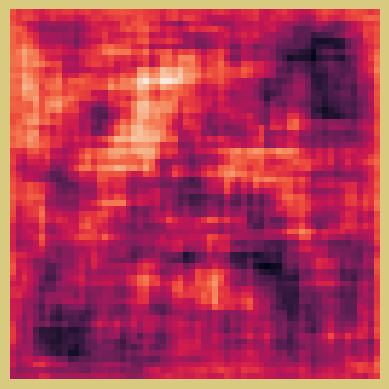

In [12]:
#Creating a random seed and output from generator
seed = tf.random.normal([1, latent_dim])
Generated_Portrait = generator(seed, training=False)
#Plotting the image output of generator without training 
plt.imshow(Generated_Portrait[0, :, :, 0])
plt.axis("off")

In [13]:
#Building a Discriminator
discriminator = Sequential()
discriminator.add(Conv2D(32, kernel_size=3, strides=2, input_shape=(64,64,3), padding="same"))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
discriminator.add(ZeroPadding2D(padding=((0,1),(0,1))))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(512, kernel_size=3, strides=1, padding="same"))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 zero_padding2d (ZeroPadding  (None, 17, 17, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 17, 17, 64)       256       
 hNormalization)                                      

In [14]:
#for the random image generated
Discriminator_Verdict = discriminator(Generated_Portrait)
print (Discriminator_Verdict)

tf.Tensor([[0.4987706]], shape=(1, 1), dtype=float32)


In [15]:
#Code Sourced from keras sample. find the link in the Resorces below

class GAN(tf.keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = tf.keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = tf.keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0]
        seed = tf.random.normal(shape=(batch_size, self.latent_dim))
        # Decode them to fake images
        generated_images = self.generator(seed)
        # Combine them with real images
        combined_images = tf.concat([generated_images, real_images], axis=0)
        # Assemble labels discriminating real from fake images
        labels = tf.concat([tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0)
        # Add random noise to the labels - important trick!
        labels += 0.05 * tf.random.uniform(tf.shape(labels))
        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

        # Sample random points in the latent space
        seed = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Assemble labels that say "all real images"
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(seed))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {"d_loss": self.d_loss_metric.result(), "g_loss": self.g_loss_metric.result()}

In [18]:

# Check if GPU is available and visible to TensorFlow
gpu_devices = tf.config.list_physical_devices('GPU')
if len(gpu_devices) == 0:
    print("No GPU found. Running on CPU.")
else:
    print("GPU(s) found. Running on GPU.")

No GPU found. Running on CPU.


In [19]:
#Defining the number of epochs
epochs = 200
#The optimizers for Generator and Discriminator
discriminator_opt = tf.keras.optimizers.Adamax(1.5e-4,0.5)
generator_opt = tf.keras.optimizers.Adamax(1.5e-4,0.5)
#To compute cross entropy loss
loss_fn = tf.keras.losses.BinaryCrossentropy()

#Defining GAN Model
model = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)

#Compiling GAN Model
model.compile(d_optimizer=discriminator_opt, g_optimizer=generator_opt, loss_fn=loss_fn)

#Fitting the GAN
history = model.fit(disco_data, epochs=epochs, verbose=2)

Epoch 1/200
28/28 - 255s - d_loss: 0.7516 - g_loss: 0.6949 - 255s/epoch - 9s/step
Epoch 2/200
28/28 - 270s - d_loss: 0.3826 - g_loss: 0.7720 - 270s/epoch - 10s/step
Epoch 3/200
28/28 - 245s - d_loss: 0.3538 - g_loss: 0.8301 - 245s/epoch - 9s/step
Epoch 4/200
28/28 - 219s - d_loss: 0.3281 - g_loss: 0.8953 - 219s/epoch - 8s/step
Epoch 5/200
28/28 - 218s - d_loss: 0.2899 - g_loss: 1.0090 - 218s/epoch - 8s/step
Epoch 6/200
28/28 - 219s - d_loss: 0.2416 - g_loss: 1.1891 - 219s/epoch - 8s/step
Epoch 7/200
28/28 - 220s - d_loss: 0.1904 - g_loss: 1.4506 - 220s/epoch - 8s/step
Epoch 8/200
28/28 - 228s - d_loss: 0.1434 - g_loss: 1.7960 - 228s/epoch - 8s/step
Epoch 9/200
28/28 - 216s - d_loss: 0.1009 - g_loss: 2.2661 - 216s/epoch - 8s/step
Epoch 10/200
28/28 - 223s - d_loss: 0.0742 - g_loss: 2.7623 - 223s/epoch - 8s/step
Epoch 11/200
28/28 - 217s - d_loss: 0.0538 - g_loss: 3.2716 - 217s/epoch - 8s/step
Epoch 12/200
28/28 - 217s - d_loss: 0.0554 - g_loss: 3.7693 - 217s/epoch - 8s/step
Epoch 13/200

KeyboardInterrupt: 

In [ ]:
#Number of images to be generate
num_img=18

#A function to generate and save images
def Potrait_Generator():
    Generated_Paintings = []
    seed = tf.random.normal([num_img, latent_dim])
    generated_image = generator(seed)
    generated_image *= 255 
    generated_image = generated_image.numpy()
    for i in range(num_img):
            img = tf.keras.preprocessing.image.array_to_img(generated_image[i])
            Generated_Paintings.append(img)
            img.save("Potraits{:02d}.png".format(i)) 
    return 

#Generating images
Images = Potrait_Generator()